# COGS 108 - Data Checkpoint

## Authors

Jing Wang: Conceptualization, Background research, Project administration, Ethics, Modeling, Communication

Qifeng Shen: Data curation, Methodology, Software, Research Question, Writing – original draft

Ivy Wu: Data curation, Analysis, Visualization, Research Question

Yuqian Gao: Analysis, Methodology, Writing – original draft

Alina Gao: Ethics, Project administration, Timeline planning, Writing – original draft, Communication

## Research Question

What listing characteristics are associated with nightly prices of Airbnb rentals in San Diego? 
- Using publicly available Airbnb listing data, we examine how capacity (accommodates/bedrooms/bathrooms), property type/room type, neighborhood or zip code, review ratings, minimum nights, and availability relate to nightly price. We estimate these associations using multiple regression (e.g., log(price)) while controlling for host experience (host listings count/superhot status), amenity indicators (Wi-Fi, parking, pool, kitchen, AC), booking policies (instant book, cancellation policy), and time-related factors (month/season) when available.



## Background and Prior Work

Airbnb has become a major platform in the short-term rental market and plays an important role in tourism and local housing economies. Nightly pricing is a key factor that affects both hosts and guests, as it influences host revenue and guest booking decisions. However, Airbnb prices are not set randomly and are often related to various listing characteristics.

Prior research has examined determinants of Airbnb pricing using publicly available listing data. For example, Wang and Nicolau (2017) found that location, property type, and review ratings significantly influence nightly prices. Similarly, Gunter (2018) showed that listings offering entire homes, larger accommodation capacity, and higher guest ratings tend to command higher prices. These studies suggest that observable characteristics such as neighborhood, property size, availability, and user-generated reviews are important predictors of rental pricing. While prior studies have examined European or multi-country markets, fewer studies focus specifically on San Diego, which motivates our city-level analysis

Building on this prior work, our project focuses on modeling Airbnb rental prices in San Diego. Specifically, we examine how listing characteristics such as location (e.g., zip code), property type (entire home vs. private room), accommodation capacity, availability, and guest review ratings jointly relate to nightly prices. We apply exploratory data analysis and regression-based modeling to estimate the relative importance of these features.

At the same time, we acknowledge that our dataset is observational and may omit unobserved factors, such as host experience, interior design quality, off-platform negotiations, or seasonal events (e.g., conventions or tourism peaks) that could also affect pricing. Therefore, our results should be interpreted as associations rather than causal effects. Our city-level analysis allows us to examine pricing patterns within a single metropolitan area while contributing to the broader literature on short-term rental pricing.

## References

- Wang, D., & Nicolau, J. L. (2017). Price determinants of sharing economy-based accommodation rental: A study of Airbnb listings. International Journal of Hospitality Management, 62, 120–131.

- Gunter, U. (2018). What makes an Airbnb listing attractive? Evidence from Europe. Tourism Economics, 24(2), 210–225.

## Hypothesis


We hypothesize that Airbnb rental prices in San Diego are associated with several characteristics, including location, size, and available services or amenities. Listings located closer to scenic areas such as the coast or forests, or city centers, are expected to be associated with higher nightly prices. These locations typically offer greater convenience and a more desirable stay experience. In addition, larger listings and those offering more amenities or higher quality service, such as pet-friendly options, may be associated with higher prices due to higher maintenance costs.

Our analysis plan begins with exploratory data analysis (EDA) to examine the distributions of rental prices and the above listing characteristics. We will use visualizations to explore how prices vary across different locations and feature categories, and then apply regression models to assess the associations between rental prices and these characteristics while controlling for other relevant variables. Throughout the analysis, we will clearly state assumptions and discuss potential limitations, such as unobserved factors like:

Interior design and quality: Listings that are well-decorated or recently renovated may command higher prices, even when their square footage is similar to other listings.

Host communication style: Hosts who respond quickly and are polite and patient with guests may increase perceived value and allow hosts to charge higher prices.

Off-platform negotiations: Some hosts may offer discounts or special rates outside of Airbnb's platform, meaning the actual transaction price may differ from the listed price in our dataset.

Subjective perceptions of neighborhood safety: Guests’ perceptions of safety may influence willingness to pay.

Proximity to major seasonal events: Large events in San Diego, such as Comic-Con, the San Diego Marathon, and the MLB season, may temporarily raise local demand and rental prices in ways that are not fully reflected in broad time variables.

## Data


### Data overview

To examine which listing characteristics are associated with Airbnb nightly prices in San Diego, we use two complementary datasets: (1) a listing-level Airbnb dataset that contains property, host, and review-related attributes, and (2) a county-level socioeconomic indicator from the U.S. Census Bureau (ACS) that provides broader context for the local housing environment.

#### Dataset #1: Airbnb Listings Data (San Diego)

**Dataset name:** Airbnb Listings Data (San Diego)  
**Source:** `data/00-raw/listings.csv` (public Airbnb listing data; stored in our project repository)  
**Unit of analysis:** One row = one Airbnb listing; one column = one listing-level attribute (tidy format).  
**Size:** 13,052 listings × 76 variables (San Diego only)

This dataset includes listing characteristics, host attributes, review activity, and geographic information. Our primary outcome is **`nightly_price`**, which represents the advertised nightly price in **USD per night** (posted price; it may differ from the final transaction price due to discounts, negotiations, or seasonal promotions). Core predictors used in our project include:

- **Capacity and property features:** `accommodates` (number of guests the listing can host), `property_type`, `room_type`
- **Location:** `zipcode`, `neighbourhood`, and geographic coordinates (`latitude`, `longitude`)
- **Booking constraints:** `minimum_nights` and `maximum_nights` (both measured in nights)
- **Reviews and quality signals:** `number_of_reviews` (count) and `review_scores_rating` (rating scale provided by the platform)
- **Amenities:** `amenities` (text field describing included amenities)

**Missingness and limitations:** Some fields are missing for systematic reasons (e.g., review-related fields such as `last_review` may be missing for listings with zero reviews). Additionally, the dataset reflects only listings visible on the platform and may not represent the full rental market in San Diego. Because this is observational data, our findings should be interpreted as associations rather than causal effects.

**Outliers:** Prices can be highly right-skewed, with a small number of extremely expensive listings. We flag unusually high prices during cleaning and use a transparent rule-based approach to reduce undue influence from extreme values.

#### Dataset #2: American Community Survey (ACS) Income (San Diego County)

**Dataset name:** ACS Table S1901 (Income in the Past 12 Months)  
**Source:** U.S. Census Bureau via `data/00-raw/ACSST1Y2024.S1901.csv`  
**Geographic level:** County (San Diego County, CA)  
**Key variable used:** Median household income (USD)

This dataset provides a high-level socioeconomic benchmark for San Diego County. We use **county-level median household income** as contextual information about the broader economic environment in which short-term rentals operate. Because our ACS variable is measured at the county level, it is not used for ZIP-code merging in this checkpoint.

**Limitations:** ACS estimates are survey-based and include sampling uncertainty. County-level indicators are coarse and do not capture within-county neighborhood variation.

In [28]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import pandas as pd

listings = pd.read_csv("data/00-raw/listings.csv", low_memory=False)

# Missingness is systematic: review date fields are missing mostly when there are 0 reviews
listings.assign(
    missing_last_review=listings["last_review"].isna()
).groupby("missing_last_review")["number_of_reviews"].describe()

,count,mean,std,min,25%,50%,75%,max
missing_last_review,,,,,,,,
False,11023.0,41.279053,63.244701,1.0,4.0,16.0,51.0,786.0
True,2027.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [34]:
listings.shape

(13052, 76)

In [36]:
listings.columns

Index(['index', 'id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'thumbnail_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'nightly_price', 'price_per_stay', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum

In [38]:
listings.isna().sum()

index                                 0
id                                    0
listing_url                           0
name                                  0
summary                             417
                                   ... 
instant_bookable                      2
is_business_travel_ready              2
cancellation_policy                   2
require_guest_profile_picture         2
require_guest_phone_verification      2
Length: 76, dtype: int64

In [42]:
listings['nightly_price'].describe()

count        13051
unique         719
top       $150.00 
freq           389
Name: nightly_price, dtype: object

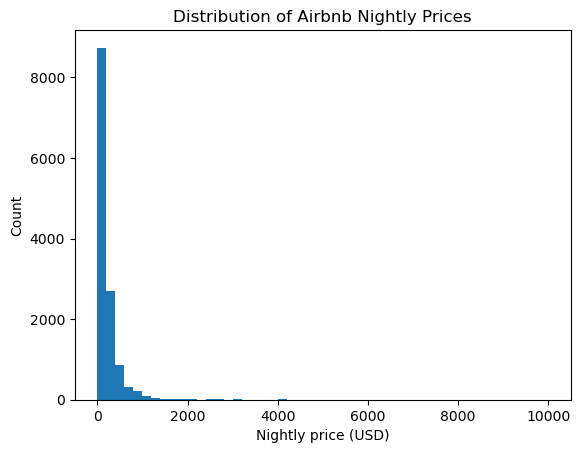

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# clean nightly_price -> numeric
price_num = (
    listings["nightly_price"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
)
price_num = pd.to_numeric(price_num, errors="coerce")

plt.hist(price_num.dropna(), bins=50)
plt.title("Distribution of Airbnb Nightly Prices")
plt.xlabel("Nightly price (USD)")
plt.ylabel("Count")
plt.show()

In [48]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

import sys
sys.path.append('./modules')
import os

# Check if data already exists
if os.path.exists('data/00-raw/listings.csv'):
    print("Data already exists, skipping download.")
else:
    print("listings.csv not found in data/00-raw/. Please add it manually.")

Data already exists, skipping download.


### Dataset #1 

Instructions: 
1. Change the header from Dataset #1 to something more descriptive of the dataset
2. Write a few paragraphs about this dataset. Make sure to cover
   1. Describe the important metrics, what units they are in, and giv some sense of what they mean.  For example "Fasting blood glucose in units of mg glucose per deciliter of blood.  Normal values for healthy individuals range from 70 to 100 mg/dL.  Values 100-125 are prediabetic and values >125mg/dL indicate diabetes. Values <70 indicate hypoglycemia. Fasting idicates the patient hasn't eaten in the last 8 hours.  If blood glucose is >250 or <50 at any time (regardless of the time of last meal) the patient's life may be in immediate danger"
   2. If there are any major concerns with the dataset, describe them. For example "Dataset is composed of people who are serious enough about eating healthy that they voluntarily downloaded an app dedicated to tracking their eating patterns. This sample is likely biased because of that self-selection. These people own smartphones and may be healthier and may have more disposable income than the average person.  Those who voluntarily log conscientiously and for long amounts of time are also likely even more interested in health than those who download the app and only log a bit before getting tired of it"
3. Use the cell below to 
    1. load the dataset 
    2. make the dataset tidy or demonstrate that it was already tidy
    3. demonstrate the size of the dataset
    4. find out how much data is missing, where its missing, and if its missing at random or seems to have any systematic relationships in its missingness
    5. find and flag any outliers or suspicious entries
    6. clean the data or demonstrate that it was already clean.  You may choose how to deal with missingness (dropna of fillna... how='any' or 'all') and you should justify your choice in some way
    7. You will load raw data from `data/00-raw/`, you will (optionally) write intermediate stages of your work to `data/01-interim` and you will write the final fully wrangled version of your data to `data/02-processed`
4. Optionally you can also show some summary statistics for variables that you think are important to the project
5. Feel free to add more cells here if that's helpful for you


# Data Wrangling – Airbnb Listings (San Diego 2025)

This section focuses on cleaning and preparing the Airbnb dataset for modeling. We restrict our analysis to the following variables:

**Target variable:**
- `nightly_price` (USD per night)

**Predictor variables:**
- `accommodates`
- `zipcode`
- `property_type`
- `minimum_nights`
- `maximum_nights`
- `amenities`

We clean missing values, remove outliers, standardize data types, and verify that the dataset is suitable for statistical modeling.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the SAME dataset as your wrangling section uses (76-column file)
listings = pd.read_csv("data/00-raw/listings.csv", low_memory=False)

# Keep only columns that actually exist in THIS file
cols_wanted = [
    "nightly_price",
    "room_type",
    "neighbourhood",
    "zipcode",
    "latitude",
    "longitude",
    "accommodates",
    "property_type",
    "minimum_nights",
    "maximum_nights",
    "number_of_reviews",
    "review_scores_rating",
    "amenities",
    "last_review",
]
cols_keep = [c for c in cols_wanted if c in listings.columns]
df = listings[cols_keep].copy()

df.shape, df.columns

((13052, 14),
 Index(['nightly_price', 'room_type', 'neighbourhood', 'zipcode', 'latitude',
        'longitude', 'accommodates', 'property_type', 'minimum_nights',
        'maximum_nights', 'number_of_reviews', 'review_scores_rating',
        'amenities', 'last_review'],
       dtype='object'))

In [64]:
df['nightly_price'] = (
    df['nightly_price']
    .replace(r'[\$,]', '', regex=True)
)

df['nightly_price'] = pd.to_numeric(df['nightly_price'], errors='coerce')
df = df.dropna(subset=['nightly_price'])
df = df[df['nightly_price'] > 0]

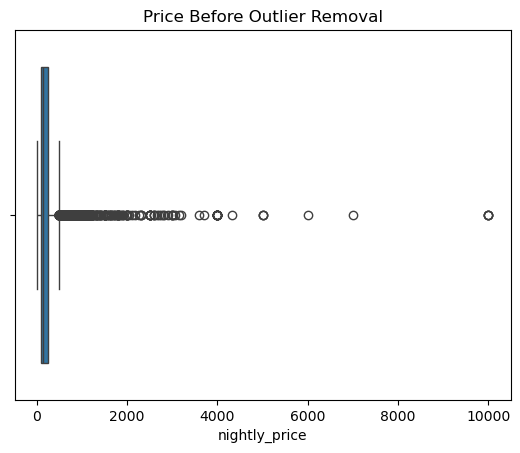

In [66]:
plt.figure()
sns.boxplot(x=df['nightly_price'])
plt.title("Price Before Outlier Removal")
plt.show()

In [68]:
Q1 = df['nightly_price'].quantile(0.25)
Q3 = df['nightly_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

df = df[(df['nightly_price'] >= lower_bound) &
        (df['nightly_price'] <= upper_bound)]

print("After removal:", df.shape)

Lower bound: -162.5
Upper bound: 497.5
After removal: (11891, 14)


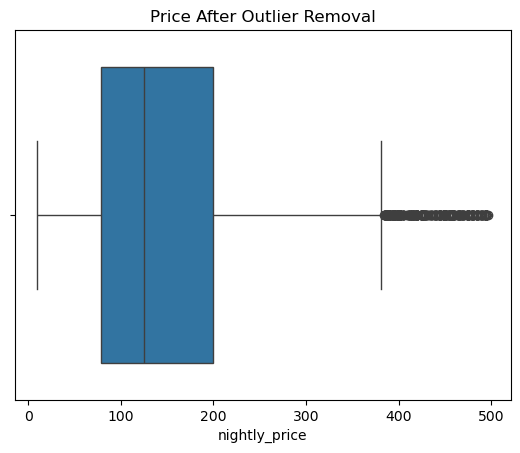

In [70]:
plt.figure()
sns.boxplot(x=df['nightly_price'])
plt.title("Price After Outlier Removal")
plt.show()

In [72]:
import os
os.makedirs("data/02-processed", exist_ok=True)

df.to_csv("data/02-processed/listings_clean.csv", index=False)

### Dataset #2 

### Dataset Description

This dataset comes from the U.S. Census Bureau's American Community Survey (ACS), Table S1901 (Income in the Past 12 Months).

We extract the median household income for San Diego County, California.

- Source: U.S. Census Bureau, ACS 1-Year Estimates (2024)
- Geographic level: County
- Variable used: Median household income (dollars)
- Column: Households!!Estimate

This dataset provides socioeconomic context that may help explain variation in Airbnb nightly prices across regions.

In [74]:
# Load Census dataset
census_raw = pd.read_csv("data/00-raw/ACSST1Y2024.S1901.csv")

# Extract median income row
median_row = census_raw[
    census_raw['Label (Grouping)'] == 'Median income (dollars)'
]

# Get median household income (Households Estimate column)
median_income = median_row[
    'San Diego County, California!!Households!!Estimate'
].values[0]

# Clean numeric format
median_income = int(median_income.replace(',', ''))

median_income

109132

## Ethics

### A. Data Collection
 -  **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
> Yes. Our project utilizes publicly available datasets (e.g., Inside Airbnb or OpenData portals). As the data is secondary and public, direct informed consent from individuals was handled by the original data collectors; however, we affirmatively opt to use this data only for academic, non-commercial research.

 -  **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
> Yes. We recognize that Airbnb data for San Diego may exhibit collection bias. Specifically, listings are skewed toward high-tourism coastal areas (like La Jolla or Pacific Beach), which may not reflect the pricing dynamics of inland or residential neighborhoods. We will acknowledge that our data only represents "active" digital users and may exclude informal or long-term rental market trends.

 -  **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?

> Yes. We recognize that Airbnb data for San Diego may exhibit collection bias. Specifically, listings are skewed toward high-tourism coastal areas (like La Jolla or Pacific Beach), which may not reflect the pricing dynamics of inland or residential neighborhoods. We will acknowledge that our data only represents "active" digital users and may exclude informal or long-term rental market trends. We will strip any Personally Identifiable Information (PII) such as host names, specific apartment numbers, or reviewer names. We will aggregate data where possible to ensure individuals cannot be re-identified through triangulation of location and price.

 -  **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?
> Because our dataset only includes listing attributes and does not contain information of guests, we are unable to evaluate downstream bias across protected groups such as race or gender. Rather than attempting to infer sensitive attributes, we treat this as a limitation of the study. We avoid potential harm by framing our results as exploratory and by avoiding normative or prescriptive conclusions based on the model outputs.

### B. Data Storage
 -  **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
> Yes. We employ a "Least Privilege" access strategy. Data is stored on password-protected local machines and within a secure GitHub private repository. During transit (e.g., downloading from APIs), we use encrypted HTTPS protocols. All intermediate data artifacts are stripped of potential identifiers to ensure that even in the event of a localized breach, the risk of re-identification is minimized.

 -  **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
> Yes. Although we are using secondary, publicly available data, we respect the "Right to be Forgotten." If a host removes their listing from the primary source (Airbnb) or contacts our team directly, we will immediately purge the corresponding records from our local storage and git history. We will perform a final data sync with Inside Airbnb before our final analysis to ensure any "forgotten" data is not included.

 -  **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

> Yes. All raw datasets containing semi-identifiable information will be deleted from local machines upon the conclusion of the Winter 2026 quarter. Only the final, anonymized analysis and aggregated results will be maintained in the GitHub repository.
> 
### C. Analysis
 -  **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
> Our analysis is based on Airbnb listing data, not the individual experiences of guests. We reconize the rpice decision can influence different communities in different ways. To address the blindspots, we state our conclusions describe pricing patterns does not represent the full housing experience in San Diego County. 

 -  **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?

> Yes. We acknowledge potential demographic bias. Beyond just "tech-savvy users," we will investigate if the data disproportionately represents higher-income areas. To avoid the over-interpretation identified in our review of previous projects, we will explicitly state that our pricing model is a reflection of platform-specific trends, not a comprehensive valuation of San Diego real estate.

 -  **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
> Our visualizations, summary statistics, and report are designed to present data clearly and accurately. We avoid makeing causal claims and do not exaggerate trends. All plots will label and results will explain with appropriate context so they will not misleading.

 -  **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
> Our analysis uses only publicly available, listing-level data and does not include personally identifiable information about hosts or guests.

 -  **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?
> All analysis steps and visualizations are documented in a reproducible Jupyter Notebook, allowing results to be review and reproduce.

### D. Modeling
 -  **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
> We are aware that some variables, such as ZIP code, may act as proxies for sensitive attributes. We will interpret these variables carefully and discuss their limitations.

 -  **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
> Because protected attribute data (e.g., race or gender) is not available, we cannot directly test fairness across groups. This limitation will be clearly stated.

 -  **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
> We will evaluate our regression models using common metrics such as MSE and R-squared.

 -  **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 -  **D.5 Communicate limitations**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?
> Yes. We will include a "Limitations and Assumptions" section. This will detail the constraints of our model (e.g., inability to account for off-platform negotiations or seasonal events like Comic-Con that temporarily spike prices). This ensures stakeholders understand the context and prevents misuse of our predictive results.

### E. Deployment
 -  **E.1 Monitoring and evaluation**: Do we have a clear plan to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?
> Since our deployment is an academic report, our monitoring plan involves a "Sensitivity Analysis." We will test our model against a small subset of the most recent 2026 data to check for Concept Drift—ensuring that the relationship between features and price hasn't fundamentally shifted due to recent economic changes in San Diego.

 -  **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 > If we discover that our model results lead to unintended consequences—such as encouraging predatory pricing in vulnerable neighborhoods—we will issue a formal "Correction and Impact Statement" on our repository. We will update our analysis to include social-impact weighting to mitigate these harms in future iterations.

 -  **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
> Yes. Our project utilizes Git version control. If a flaw is discovered in the final model, we can immediately roll back the repository to a previous stable state. All shared notebooks and data summaries are versioned, allowing us to "un-publish" or revert any misleading findings instantly.

 -  **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?
> Yes. We have included a Terms of Use disclaimer in our repository. This explicitly prohibits the use of our predictive model for automated commercial rent-seeking or for justifying the displacement of long-term tenants. We emphasize that the model is for exploratory academic purposes only.
 -  Ethical Narrative: > Our project prioritizes Data Privacy and Transparency. While our San Diego Airbnb dataset is publicly sourced, we acknowledge that hosts may not have explicitly consented to their information being used for predictive modeling. To mitigate potential harm, we will ensure that no exact geo-coordinates (latitude/longitude) are displayed in high-resolution visualizations to prevent the identification of specific private residences.

Furthermore, we are committed to addressing Proxy Discrimination. In San Diego, variables such as "Zip Code" or "Neighborhood" are often highly correlated with race and socioeconomic status. We will audit our pricing model to ensure it does not inadvertently reinforce historical housing discrimination or "redlining" effects by over-penalizing certain neighborhoods. Finally, learning from previous work, we will explicitly document our model's limitations to prevent over-interpretation of the findings, ensuring our conclusions are used responsibly within the scope of academic research.

## Team Expectations 

The team expectations established in the proposal remain in effect. We have continued using the same communication and collaboration structure throughout the data checkpoint stage.
* Communication: Our primary mode of communication will be via WeChat for daily updates and Zoom/In-person for weekly syncs every Wednesday. We expect all members to respond to messages within 24 hours. For urgent matters, we will use phone calls or specific @ mentions.
* Tone & Culture: We agree to a "blunt but polite" feedback loop. To ensure a constructive environment, we will use "I" statements (e.g., "I am concerned this analysis might miss X") to focus on the project rather than individuals. We will actively ensure that every member has a chance to speak during meetings.
* Decision Making: Major project decisions, such as changing the research question or final model selection, will be decided by a majority vote. For smaller, specialized tasks, authority is delegated to the respective section leads. If a quick decision is needed and a member is non-responsive, the active majority will proceed.
* Task Assignment & Accountability: Tasks will be assigned based on individual strengths and tracked using GitHub Issues. We aim for an equal distribution of effort across wrangling, analysis, and writing. If a member is struggling with a deadline, they must notify the group at least 48 hours in advance so we can re-allocate resources.
* Conflict Resolution: Should a conflict arise, the team will first hold a private "neutral ground" discussion to understand different perspectives. We agree to assume positive intent. If a teammate consistently fails to meet agreed-upon expectations, we will provide written notice via email and, if no improvement is seen within one week, we will contact the instructor as per course policy.


## Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| week2-Jan15  |  1 PM | Everyone:Read & Think about COGS 108 expectations; brainstorm topics/questions <br> Jing: Draft initial project topic and research question.| Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| week3-Jan22  |  10 AM |  Everyone: Do background research on topic <br>Jing: Draft Background & Prior Work (2-3 paragraphs). <br>Qifeng: Describe ideal Data (variables like price, location, room type). <br>Alina: Draft Ethics & Privacy + Team Expectations. | Discuss ideal dataset(s) and ethics; draft project proposal; Assign group members to lead each specific part | 
| week5-Feb3  | 10 PM  | Everyone: Edit, finalize, Final proofreading and submit proposal; Search for datasets<br>Yuqian: Write Analysis Plan (Regression/EDA focus).<br>Jing: Merge all sections into the final notebook; Check against rubric. | Submit Proposal. Discuss specific data acquisition strategy for San Diego Airbnb (Inside Airbnb/Kaggle). Wrangling and possible analytical approaches;   |
| week6-Feb11  | 6 PM  | Qifeng: Download and document the SD Airbnb dataset.<br>Ivy: Perform initial Data Cleaning (handling missing prices, filtering SD coordinates).<br>Yuqian: Preliminary EDA on price distribution. | Review Wrangling/EDA: Discuss if we need more features (e.g., amenities, proximity to coast) to test the hypothesis.   |
| week7-Feb18  | 12 PM  | Ivy: Finalize EDA visualizations (Price vs. Location heatmaps).<br>Yuqian: Run initial Regression Models (Price ~ Distance to coast + Room type).<br>Jing: Draft Checkpoint #1 documentation.; submit Checkpoint #1: Data* | Submit Checkpoint #1. Discuss if the model results support the hypothesis that scenic areas = higher prices. |
| week9-Mar3  | 12 PM  | Yuqian: Finalize Modeling & Interpretation of results.<br>Alina: Write Discussion (limitations of observational data) & Conclusion.<br>Ivy: Optimize all charts for clarity.<br>Jing: Compile the full project notebook.| Full Project Review: Edit the narrative flow; Ensure ethics/limitations are thoroughly addressed. Submit Checkpoint #2. |
| week10-Mar11  | Before 11:59 PM  | Alina: Finalize Video script & narration coordination.<br>Jing: Final check on all rubric requirements and formatting.<br>Everyone: Complete peer evaluation surveys. | Final Submission: Turn in the Final Project, Video, and Group Surveys. |